In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sns
import os
from PIL import Image
import cv2

In [5]:
train_path= r"C:Users\samik\Downloads\archive (2)\Training"
test_path= r"C:Users\samik\Downloads\archive (2)\Validation"
train_male= r"C:\Users\samik\Downloads\archive (2)\Training\male"
train_female= r"C:\Users\samik\Downloads\archive (2)\Training\female"
test_male= r"C:\Users\samik\Downloads\archive (2)\Validation\male"
test_female= r"C:\Users\samik\Downloads\archive (2)\Validation\female"

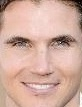

In [6]:
Image.open(r"C:\Users\samik\Downloads\archive (2)\Training\male\090563.jpg.jpg")

In [7]:

male_train=[]
label=[]
for i in os.listdir(train_male):
    if os.path.isfile(train_male+ "/"+ i):
        males=Image.open(train_male+ "/"+ i).convert("L")
        males=males.resize((50,50), Image.ANTIALIAS)
        males= np.asarray(males)/255
        male_train.append(males)
        label.append(1)

In [8]:
len(label), len(male_train)

(23766, 23766)

In [9]:

female_train=[]
for i in os.listdir(train_female):
    if os.path.isfile(train_female + "/"+ i):
        females=Image.open(train_female+ "/"+ i)
        females= females.resize((50,50), Image.ANTIALIAS).convert("L")
        females= np.asarray(females)/255
        female_train.append(females)
        label.append(0)

In [10]:
len(label), len(female_train)

(47009, 23243)

In [11]:
x_train= np.concatenate((male_train, female_train), axis=0)
y_train= np.asarray(label)
y_train= y_train.reshape(x_train.shape[0],1)

In [12]:
print("woman faces", np.shape(female_train), "man faces", np.shape(male_train))
print("train dataset", x_train.shape, "train values", y_train.shape)

woman faces (23243, 50, 50) man faces (23766, 50, 50)
train dataset (47009, 50, 50) train values (47009, 1)


In [13]:
male_test=[]
label2=[]
for i in os.listdir(test_male):
    if os.path.isfile(test_male+ "/"+i):
        male_face= Image.open(test_male + "/"+ i).convert("L")
        male_face=male_face.resize((50,50), Image.ANTIALIAS)
        male_face= np.asarray(male_face)/255
        male_test.append(male_face)
        label2.append(1)



In [14]:
female_test=[]
for i in os.listdir(test_female):
    if os.path.isfile(test_female+ "/"+i):
        female_face= Image.open(test_female+"/"+i).convert("L")
        female_face= female_face.resize((50,50), Image.ANTIALIAS)
        female_face=np.asarray(female_face)/255
        female_test.append(female_face)
        label2.append(0)

In [15]:
x_test= np.concatenate((male_test, female_test), axis=0)
y_test= np.asarray(label2)
y_test= y_test.reshape(x_test.shape[0],1)

In [16]:
print("man faces", np.shape(male_test), "female faces", np.shape(female_test))
print("test dataset", x_test.shape, "test dataset value", y_test.shape)

man faces (5808, 50, 50) female faces (5841, 50, 50)
test dataset (11649, 50, 50) test dataset value (11649, 1)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [18]:
enc= LabelEncoder()

In [19]:
model= LogisticRegression()

In [108]:
x= np.concatenate((x_train, x_test), axis=0)
y= np.concatenate((y_train, y_test), axis=0)
x= x.reshape(x.shape[0], x.shape[1]*x.shape[2])

In [109]:
print("x shape: {}". format(x.shape))
print("y shape:{}".format(y.shape))

x shape: (58658, 2500)
y shape:(58658, 1)


In [22]:
model.fit(x,y)

LogisticRegression()

In [23]:
model.coef_

array([[-0.64668113, -0.35547824, -0.21313781, ...,  0.15449571,
         0.09135779, -0.03171214]])

In [24]:
pred= model.predict(x)

In [25]:
pred[:5]

array([1, 0, 1, 1, 1])

In [110]:
x[:5]

array([[0.05098039, 0.04313725, 0.03529412, ..., 0.01176471, 0.        ,
        0.        ],
       [0.03921569, 0.03921569, 0.04705882, ..., 0.25882353, 0.10588235,
        0.05882353],
       [0.77647059, 0.80392157, 0.78431373, ..., 0.28627451, 0.35686275,
        0.36078431],
       [0.17647059, 0.14901961, 0.19607843, ..., 0.0745098 , 0.08235294,
        0.08627451],
       [0.21176471, 0.25882353, 0.32941176, ..., 0.45882353, 0.27843137,
        0.13333333]])

In [111]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [112]:
from sklearn.metrics import *

In [113]:
accuracy_score(y, pred)

0.8626615295441372

In [114]:
confusion_matrix(y,pred)

array([[25004,  4080],
       [ 3976, 25598]], dtype=int64)

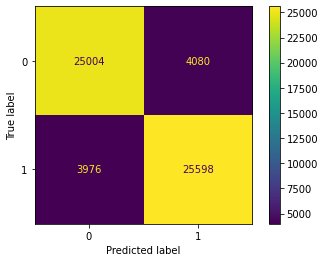

In [115]:
plot_confusion_matrix(model, x, y)

In [116]:
recall_score(y, pred)

0.8655575843646446

In [117]:
precision_score(y, pred)

0.8625244288698699

In [118]:
f1_score(y, pred)

0.8640383446972254

In [119]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     29084
           1       0.86      0.87      0.86     29574

    accuracy                           0.86     58658
   macro avg       0.86      0.86      0.86     58658
weighted avg       0.86      0.86      0.86     58658



In [120]:
pred[:5]

array([1, 0, 1, 1, 1])

In [122]:
import cv2
import numpy as np
import os


In [134]:
dataset = cv2.CascadeClassifier("data.xml")
vid = cv2.VideoCapture(0)

name_list = {0:"Female", 1:"Male"}

while True:
    ret, frame = vid.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = dataset.detectMultiScale(gray, 1.2)
        for x,y,w,h in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 255, 0), 2)
            face = gray[y:y+h, x:x+w]
            # print(face)
            face = cv2.resize(face, (50,50))
            # name = name_list[int(knn(face.reshape(50,50), x_train))]
            name = name_list[int(round(model.predict(face.reshape(1, 2500))[0], 0))]
            cv2.putText(frame, name, (x,y), cv2.FONT_HERSHEY_PLAIN, 5, (255, 180,0))
        cv2.imshow("result", frame)
        if cv2.waitKey(1) == 27:
            break
    else:
        print("Some Problem")

cv2.destroyAllWindows()
vid.release()